In [ ]:
import math
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
T=15
n=100
sigma=0.3
h=0.1
z=2.5

In [ ]:
k=int(T/h*2)
sum1=0
sum2=0
sqsum1=0
sqsum2=0

sum12=0
sum22=0
sqsum12=0
sqsum22=0

sumz=0

for t in range(n):
  ksi=[]
  for i in range(k):
    buf=[]
    for j in range (2):
      buf.append(sps.norm(0, sigma * math.sqrt(h/2)).rvs(size = 1))
    ksi.append(buf)

  W=[]
  W.append([0,0])
  W2=[]
  W2.append([0,0])
  l=0
  for i in range(0,k,2):
    buf=[]
    buf2=[]
    buf2_=[]
    for j in range (2):
      buf2.append(W2[i][j]+ksi[i][j])
      buf.append(W[l][j]+ksi[i][j]+ksi[i+1][j])
    W.append(buf)
    W2.append(buf2)
    for j in range (2):
      buf2_.append(W2[i+1][j]+ksi[i+1][j])
    W2.append(buf2_)
    sum1+=abs(W[l+1][0]-W[l][0])
    sum2+=abs(W[l+1][1]-W[l][1])
    sqsum1+=(W[l+1][0]-W[l][0])**2
    sqsum2+=(W[l+1][1]-W[l][1])**2

    sum12+=abs(W2[i+1][0]-W2[i][0])
    sum22+=abs(W2[i+1][1]-W2[i][1])
    sqsum12+=(W2[i+1][0]-W2[i][0])**2
    sqsum22+=(W2[i+1][1]-W2[i][1])**2

    sum12+=abs(W2[i+2][0]-W2[i+1][0])
    sum22+=abs(W2[i+2][1]-W2[i+1][1])
    sqsum12+=(W2[i+2][0]-W2[i+1][0])**2
    sqsum22+=(W2[i+2][1]-W2[i+1][1])**2
    l+=1
  if ((W[l][0])**2+(W[l][1])**2>=z**2): sumz+=1
Sum1=sum1/n
Sum2=sum2/n
sqSum1=sqsum1/n
sqSum2=sqsum2/n

Sum12=sum12/n
Sum22=sum22/n
sqSum12=sqsum12/n
sqSum22=sqsum22/n

print("Sum1 =",Sum1)
print("Sum2 =",Sum2)
print("sqSum1 =",sqSum1)
print("sqSum2 =",sqSum2)
print("Sum12 =",Sum12)
print("Sum22 =",Sum22)
print("sqSum12 =",sqSum12)
print("sqSum22 =",sqSum22)
print("sumz =",sumz/n)

#pd.DataFrame(data=W)

#pd.DataFrame(data=W2)

Sum1 = [11.31531964]
Sum2 = [11.38862212]
sqSum1 = [1.32907314]
sqSum2 = [1.35545992]
Sum12 = [16.09776016]
Sum22 = [16.09904568]
sqSum12 = [1.35289652]
sqSum22 = [1.36122214]
sumz = 0.12


In [ ]:
P = 1 - sps.chi2(2).cdf((z**2)/(sigma**2 * T))
print(P)

0.09878447572983218


In [ ]:
amount_z = 0
for i in range(0, n):
    if np.linalg.norm(Model1[i, N, :]) >= z:
        amount_z += 1
amount_z /= n


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


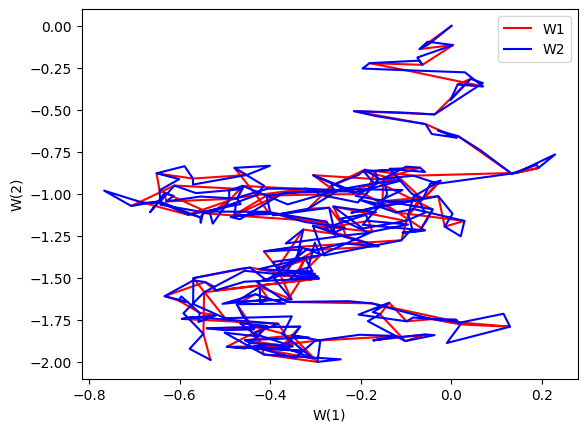

In [ ]:
M=np.transpose(W)
M2=np.transpose(W2)
plt.plot(M[0], M[1], color='red',label='W1')
plt.plot(M2[0], M2[1], color='blue',label='W2')
plt.xlabel("W(1)")
plt.ylabel("W(2)")
plt.legend()
plt.show()